# Python Data Science Case study: Mercari Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.tsv',sep = '\t')

In [3]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
data.shape

(1482535, 8)

In [5]:
data.isna().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [6]:
train, test = train_test_split(data,test_size = 0.2)
print(train.shape,test.shape)

(1186028, 8) (296507, 8)


In [7]:
data['brand_name'].isna().sum()/data['brand_name'].shape[0]

0.4267568725190299

We have 42 % na values in our data in the brand_name column. we're choosing to keep them as a category instead of dropping them.

# EDA

Let's look at the price first

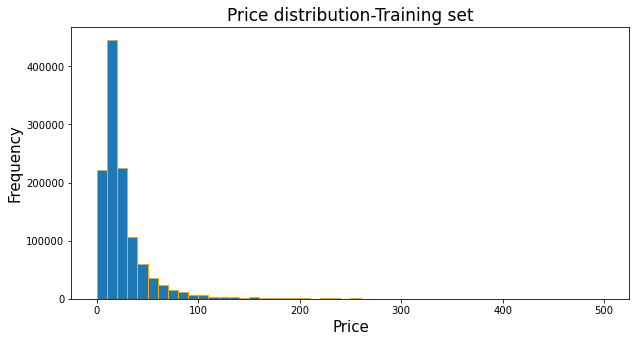

In [8]:
train['price'].plot.hist(bins=50, figsize = (10,5),edgecolor='orange',range=[0,500])
plt.xlabel('Price',fontsize =15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Price distribution-Training set',fontsize =17)
plt.show()

In [9]:
train['price'].describe()

count    1.186028e+06
mean     2.671830e+01
std      3.842460e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.004000e+03
Name: price, dtype: float64

SHIPPING FEE

In [10]:
100*train['shipping'].value_counts(normalize=True)

0    55.253755
1    44.746245
Name: shipping, dtype: float64

55.26% of items are paid for by buyers and the rest by seller. lte's look at their distribution

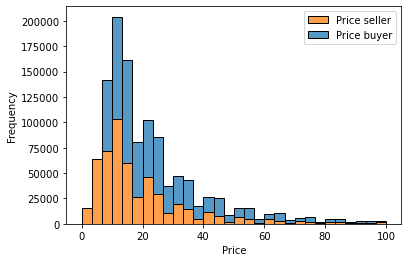

In [11]:
sns.histplot(x="price", hue = 'shipping', data= train,multiple = "stack",bins=30,binrange=(0,100))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(labels =['Price seller','Price buyer'])

We notice that for higher prices its mostly buyers paying for shipping which is unintuitive

Looking at Item Condition,please ntoe, it's mentioned in the Q that lower the value, higher the condition.

In [12]:
train['item_condition_id'].value_counts(normalize=True)

1    0.432272
3    0.291672
2    0.253034
4    0.021410
5    0.001611
Name: item_condition_id, dtype: float64

In [13]:
price_100= train[train['price']<100]

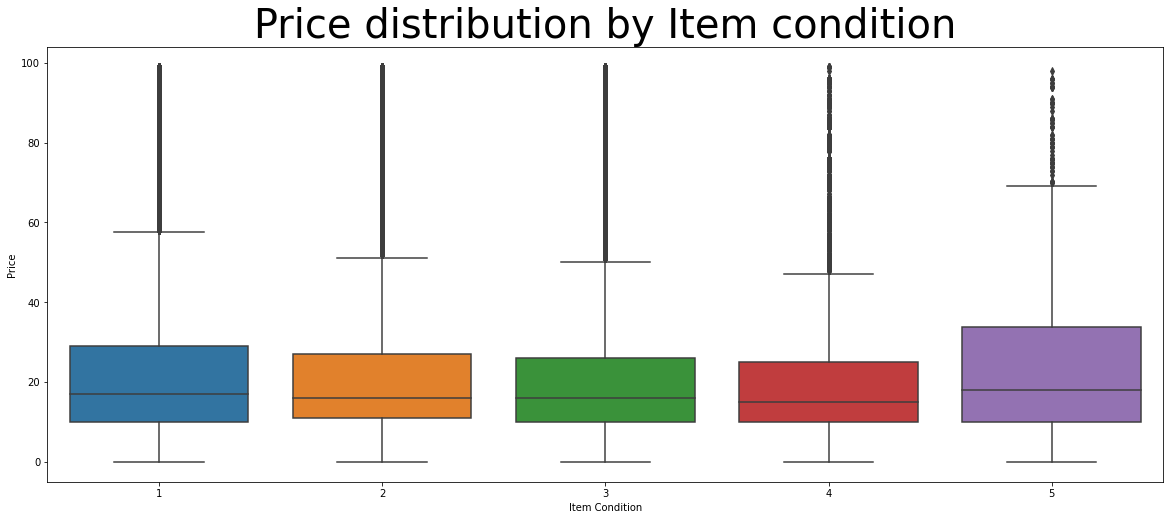

In [14]:
fig,ax = plt.subplots(figsize=(20,8))
sns.boxplot(x='item_condition_id', y ='price',data=price_100,ax=ax)

plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.title('Price distribution by Item condition',fontsize = 40)
plt.show()

It's weird that low condition items have the highest median


Let's  look at Category now

In [15]:
train['category_name'].value_counts(normalize = True).idxmax()

'Women/Athletic Apparel/Pants, Tights, Leggings'

In [16]:
train['category_name'].value_counts(normalize = True)

Women/Athletic Apparel/Pants, Tights, Leggings    4.082917e-02
Women/Tops & Blouses/T-Shirts                     3.152560e-02
Beauty/Makeup/Face                                2.331099e-02
Beauty/Makeup/Lips                                2.025835e-02
Electronics/Video Games & Consoles/Games          1.803556e-02
                                                      ...     
Home/Furniture/Replacement Parts                  8.467795e-07
Men/Suits/One Button                              8.467795e-07
Handmade/Patterns/Painting                        8.467795e-07
Handmade/Bags and Purses/Other                    8.467795e-07
Handmade/Quilts/Trim                              8.467795e-07
Name: category_name, Length: 1271, dtype: float64

In [17]:
# train['main_category']=0
# train['first_subcategory']=0
# train['second_subcategory']=0
mainc=[]
firstc=[]
secondc=[]

for i in range(train['category_name'].shape[0]):
    
    temp = str(train['category_name'].values[i]).split('/')
    if temp[0]!='':
        mainc.append(temp[0])
    else:
        mainc.append('category_unknown')
    
    if len(temp)>1 and temp[1]!='' :
        firstc.append(temp[1])
    else:
        firstc.append('category_unknown')
    
    
    if len(temp)>2 and temp[2]!='':
        secondc.append(temp[2])
    else:
        secondc.append('category_unknown')

        
#s.replace({'a': None})

In [18]:
train['main_category']=mainc
train['first_subcategory']=firstc
train['second_subcategory']=secondc

In [19]:
train['main_category']=train['main_category'].str.lower()
train['first_subcategory']=train['first_subcategory'].str.lower()
train['second_subcategory']=train['second_subcategory'].str.lower()

In [20]:
train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,first_subcategory,second_subcategory
274592,274592,Under armour camo hoodie,1,Men/Sweats & Hoodies/Hoodie,Under Armour,44.0,0,Brand new w tags Lowest I'll go,men,sweats & hoodies,hoodie
359000,359000,Boys Under Armour size 7,4,Sports & Outdoors/Apparel/Boys,Under Armour,6.0,1,Boys Under Armour long sleeve shirt size 7. Ha...,sports & outdoors,apparel,boys
670594,670594,Bundle For Desiree Taylor,3,Women/Pants/Other,PINK,23.0,0,(S) Victoria’s Secret PINK Yoga Capri Color: B...,women,pants,other
304149,304149,Hourglass highlight,3,Beauty/Makeup/Face,Hourglass Cosmetics,9.0,0,No description yet,beauty,makeup,face
461650,461650,Tin Palm Decor,2,Home/Home Décor/Home Décor Accents,NaN,8.0,1,This is a tin multi colored palm tree. Hanger ...,home,home décor,home décor accents


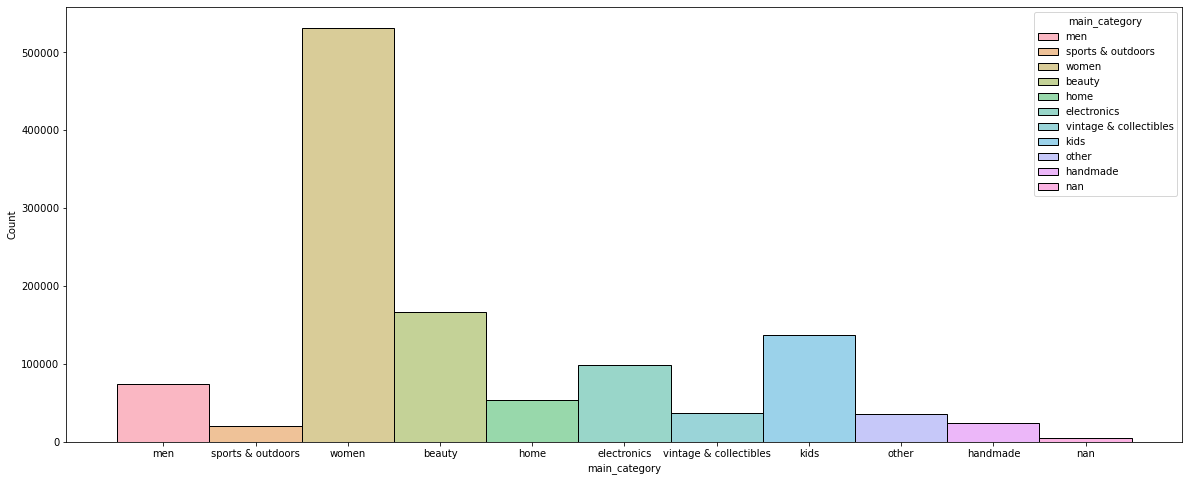

In [21]:
fig,ax = plt.subplots(figsize =(20,8))
sns.histplot(x='main_category', data = train,ax=ax,hue = 'main_category')

plt.show()


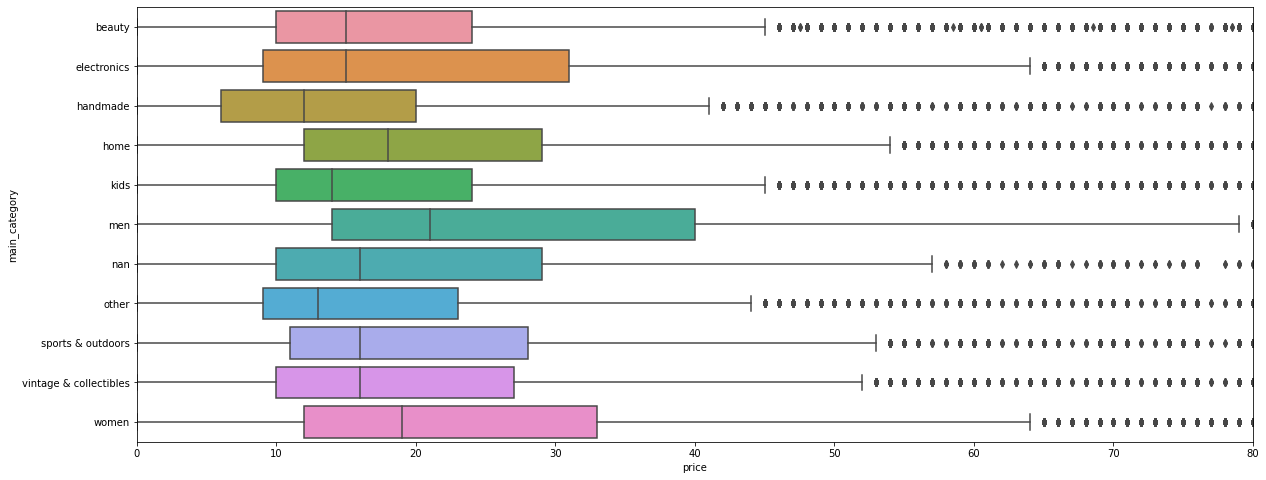

In [22]:
#cats = train['main_category'].values

fig,ax = plt.subplots(figsize =(20,8))
sns.boxplot(x='price', y='main_category', data = train,ax=ax,order= train.groupby(by=["main_category"])["price"].median().iloc[::-1].index.sort_values())
plt.xlim(0,80)
plt.show()

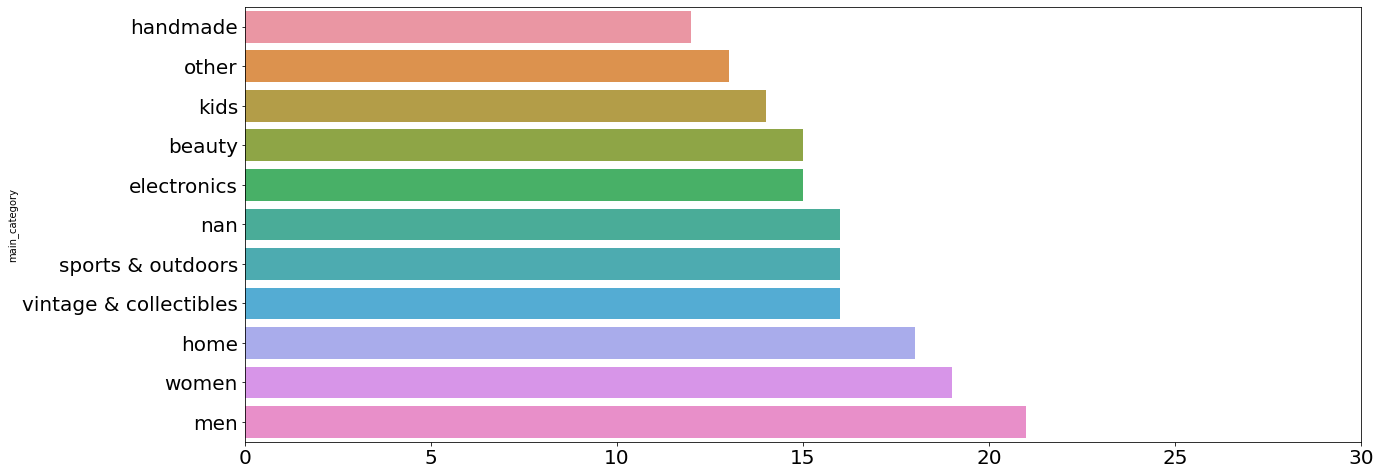

In [23]:
order= train.groupby(by=["main_category"])["price"].median().sort_values()
fig,ax = plt.subplots(figsize =(20,8))
sns.barplot(x = order.values, y =order.index,ax=ax)
plt.xlim(0,30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()


In [24]:

order2 = train.groupby(by=['first_subcategory'])['price'].sum()

order2

first_subcategory
accessories                125273.0
antique                    120228.0
apparel                     38853.0
art                          7618.0
artwork                     14102.5
                            ...    
video games & consoles     922498.0
weddings                    10038.0
women's accessories       1039275.5
women's handbags          2138020.0
woodworking                  2139.0
Name: price, Length: 114, dtype: float64

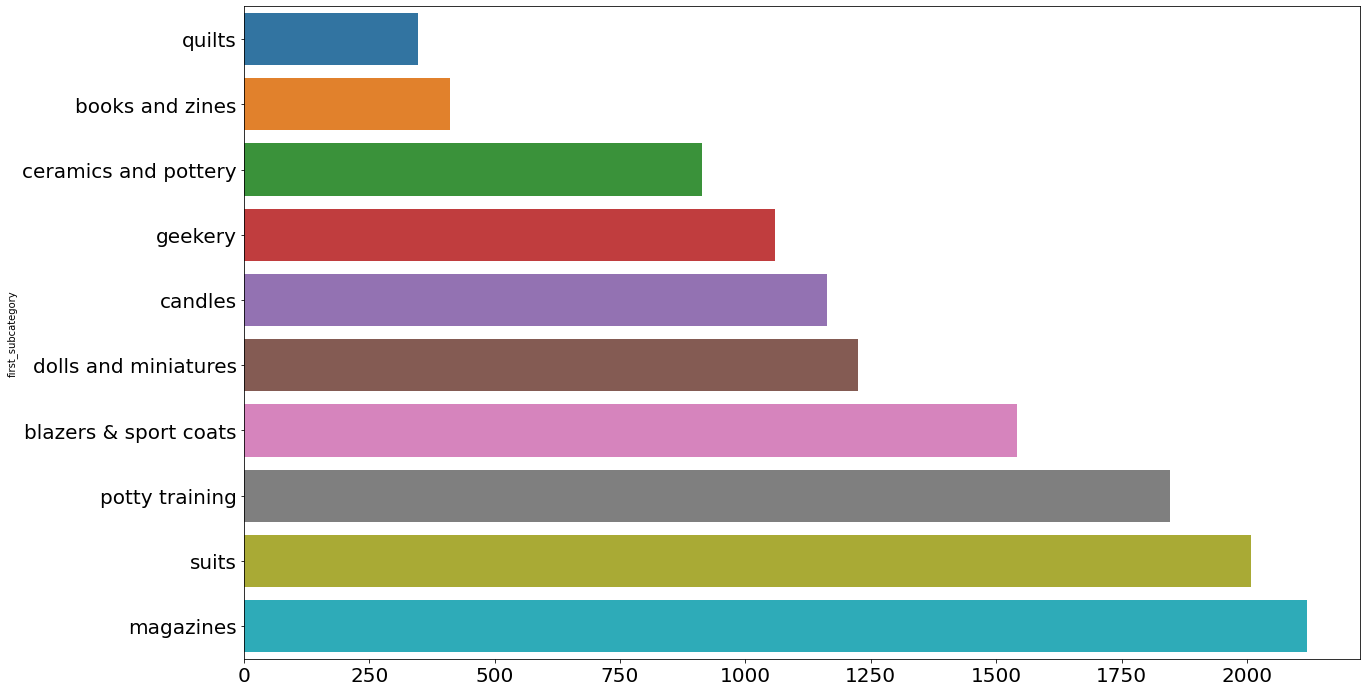

In [25]:
order2 = train.groupby(by=['first_subcategory'])['price'].sum().sort_values().head(10)
fig,ax = plt.subplots(figsize=(20,12))
sns.barplot(x = order2.values, y =order2.index,ax=ax)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()


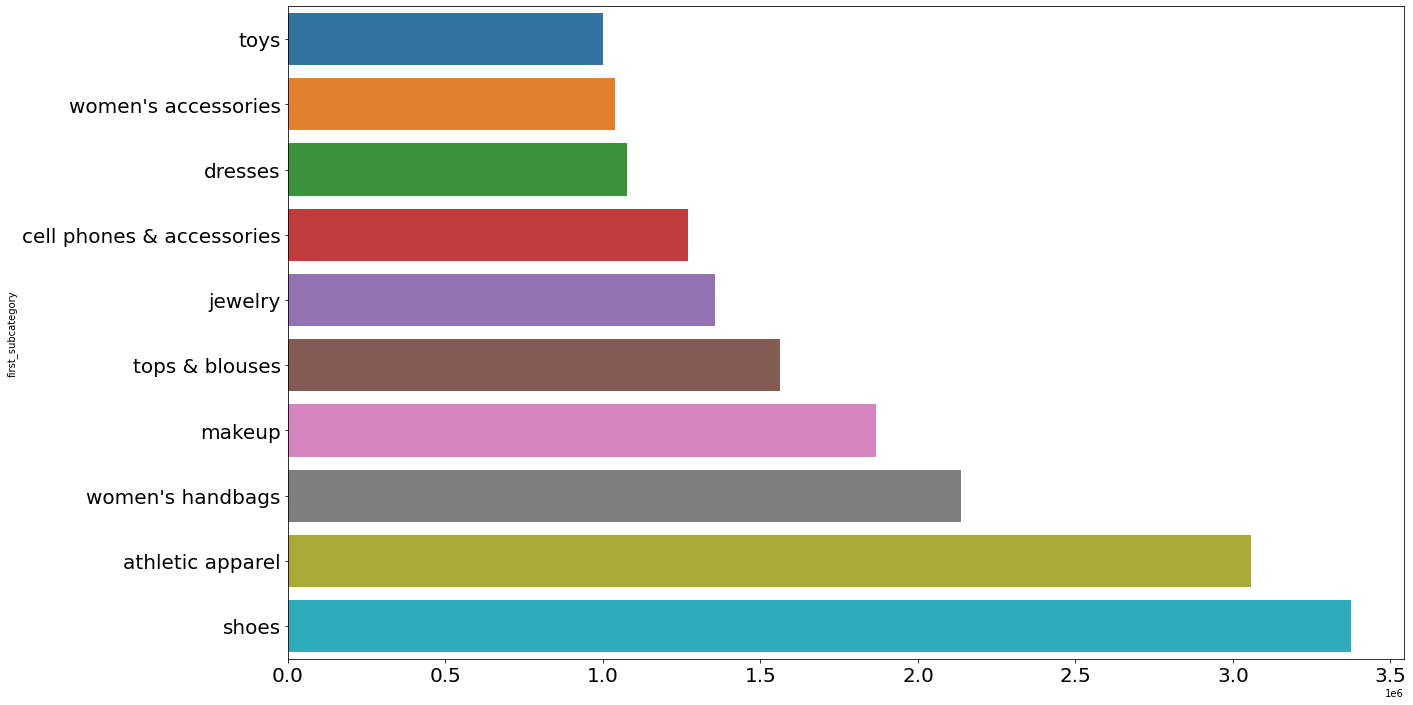

In [26]:
med_order= train.groupby(by=["first_subcategory"])["price"].median().sort_values(ascending=True)
order2 = train.groupby(by=['first_subcategory'])['price'].sum().sort_values().tail(10)
order2

fig,ax = plt.subplots(figsize=(20,12))
sns.barplot(x = order2.values, y =order2.index,ax=ax)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

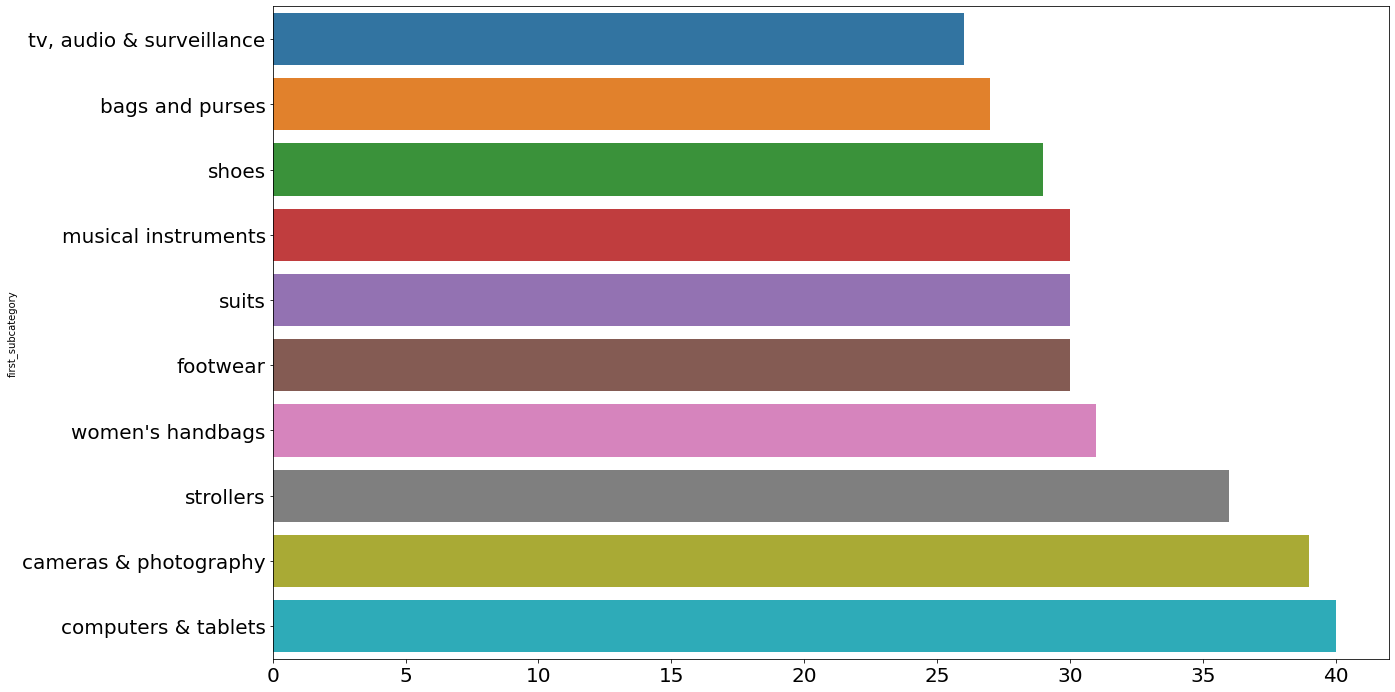

In [27]:
med_order2= train.groupby(by=["first_subcategory"])["price"].median().sort_values().tail(10)

# order2 = train.groupby(by=['first_subcategory'])['price'].sum().sort_values().tail(10)
# print(type(order2))
fig,ax = plt.subplots(figsize=(20,12))
sns.barplot(x = med_order2.values, y =med_order2.index,ax=ax)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

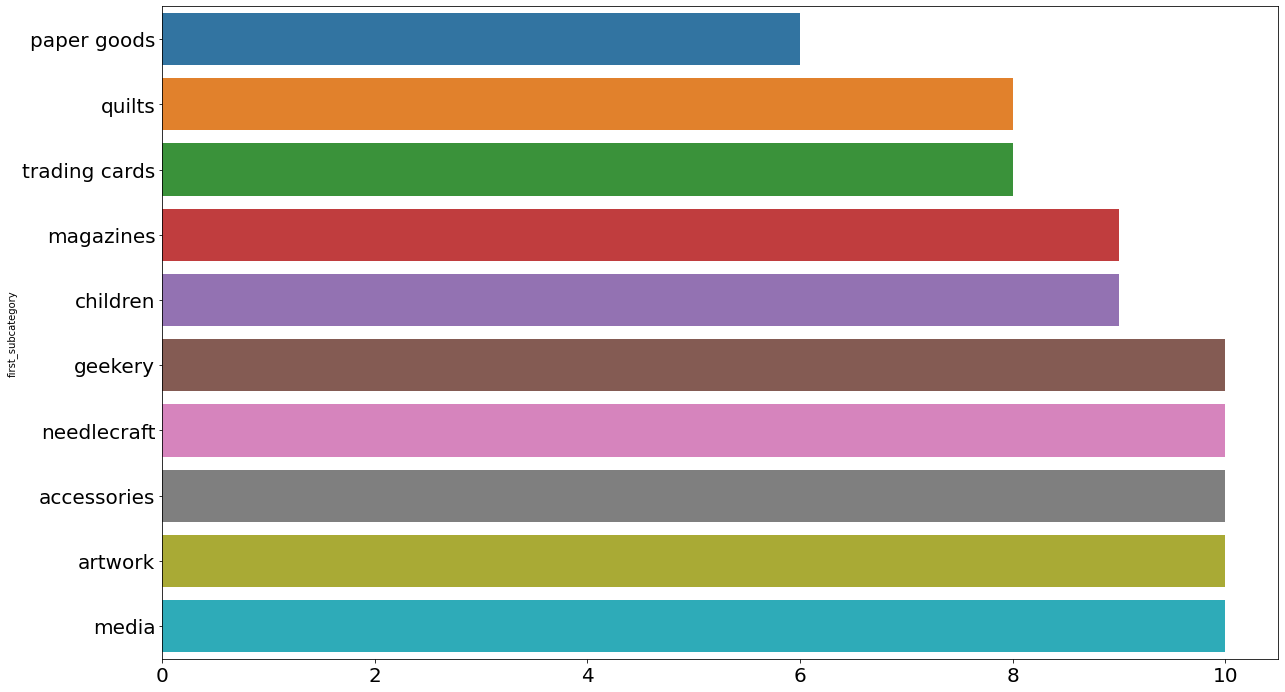

In [28]:
med_order2= train.groupby(by=["first_subcategory"])["price"].median().sort_values().head(10)

# order2 = train.groupby(by=['first_subcategory'])['price'].sum().sort_values().tail(10)
# print(type(order2))
fig,ax = plt.subplots(figsize=(20,12))
sns.barplot(x = med_order2.values, y =med_order2.index,ax=ax)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

Looking at brand_name

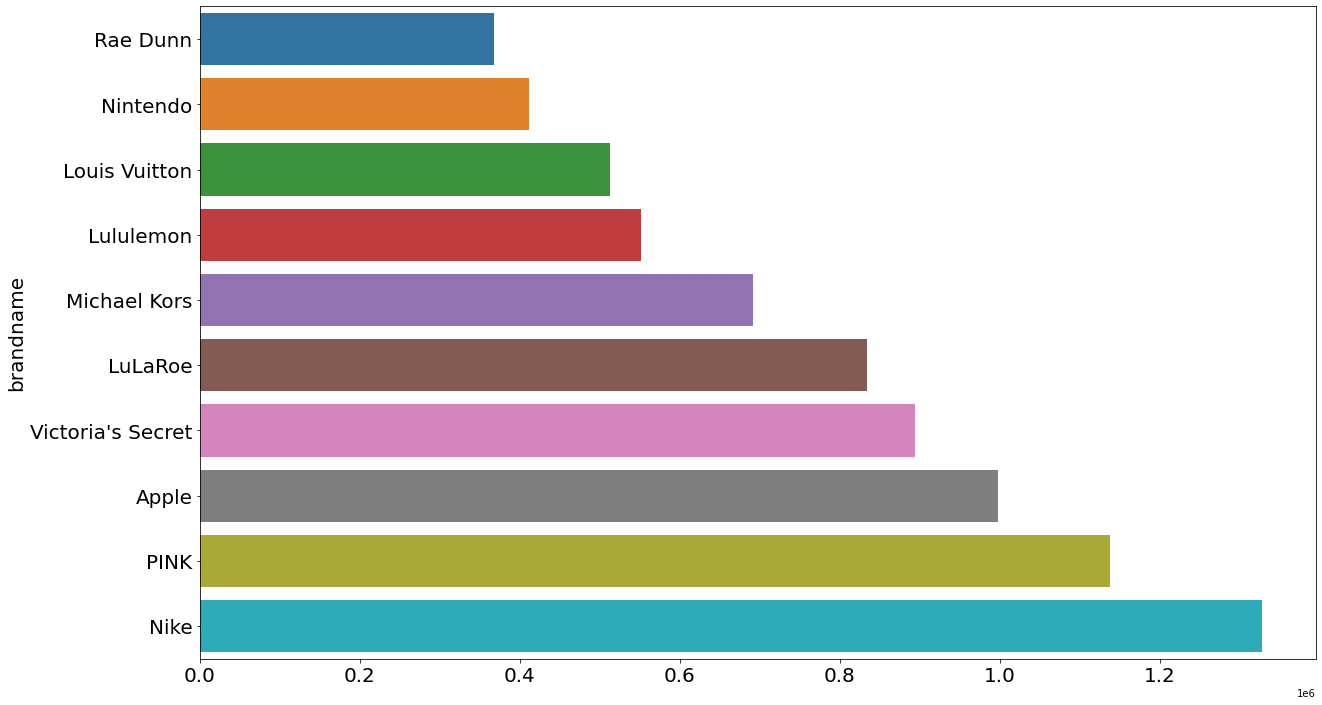

In [29]:
brorder = train.groupby(by=['brand_name'])['price'].sum().sort_values().tail(10)

fig,ax = plt.subplots(figsize=(20,12))
sns.barplot(x = brorder.values, y =brorder.index,ax=ax)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('brandname',fontsize =20)
plt.show()

In [30]:
train['brand_name']=train['brand_name'].fillna('brand_na')

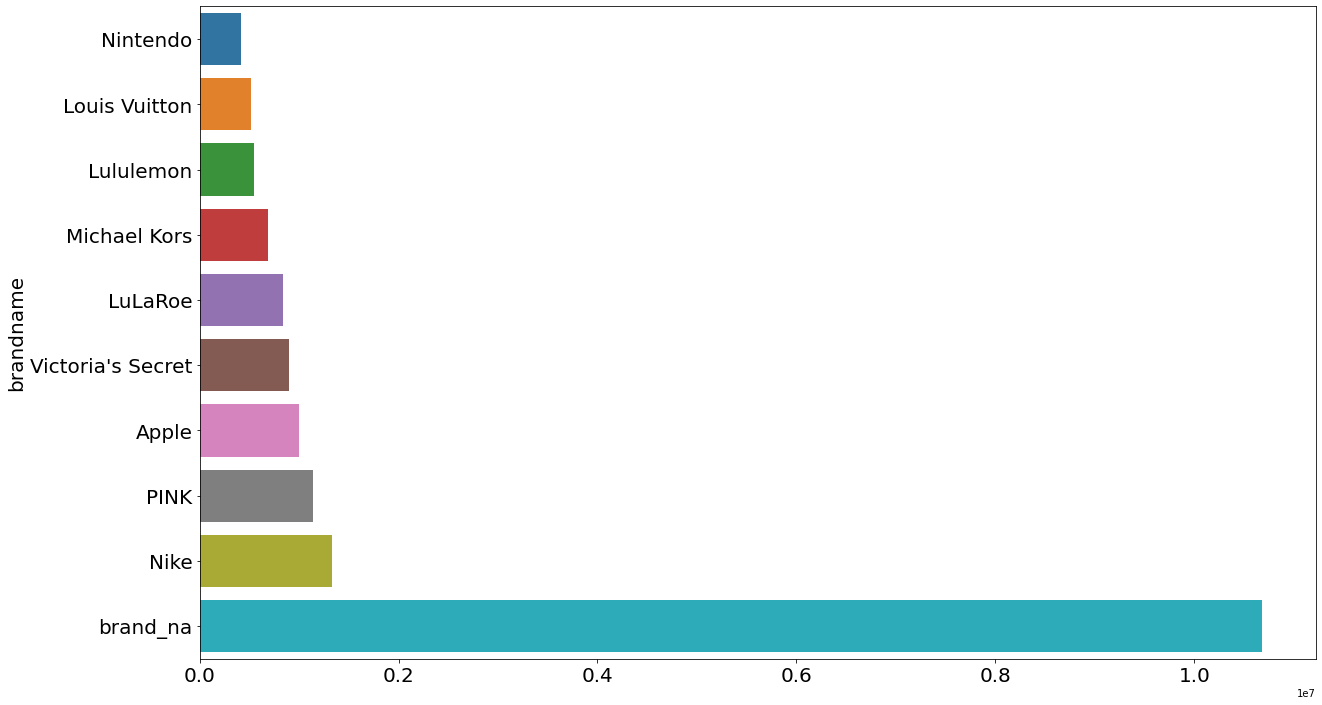

In [31]:
brorder = train.groupby(by=['brand_name'])['price'].sum().sort_values().tail(10)

fig,ax = plt.subplots(figsize=(20,12))
sns.barplot(x = brorder.values, y =brorder.index,ax=ax)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('brandname',fontsize =20)
plt.show()

In [32]:
train['brand_name'].value_counts()

brand_na                505968
PINK                     43250
Nike                     43198
Victoria's Secret        38479
LuLaRoe                  24824
                         ...  
Julie Brown                  1
Victoria Jones               1
Nothing But Love             1
China Glaze Co. Ltd.         1
Pinky                        1
Name: brand_name, Length: 4552, dtype: int64

In [33]:
kk = [1  if i=='brand_na' else 0 for i in train['brand_name'].values ]

In [34]:
train['br_na'] = kk

(0.0, 100.0)

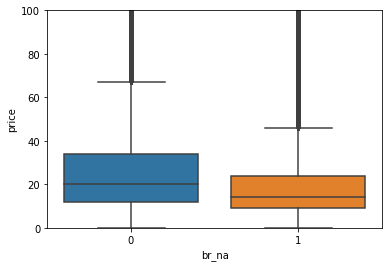

In [35]:
sns.boxplot(x='br_na',y = 'price',data = train)
plt.ylim(0,100)


price is lower when the brand name is not given

In [36]:
train['item_description'] = train['item_description'].str.lower()
pol = ['no_desc' if i == 'NaN' else i for i in train['item_description'].values]
train['item_description']=pol



In [37]:
pol = [str(i) for i in pol ]


In [38]:
#pol

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words ='english')
X= vectorizer.fit_transform(pol)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.head()